Análise das vendas do Walmart (dataset obtido no Kaggle). 20/02/24

In [ ]:
#Importando bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#Adicionando o caminho da dataset localizado no google drive

from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Datasets/")

Mounted at /content/gdrive


In [ ]:
#Iniciando a exploração dos dados

dados = pd.read_csv('Walmart.csv')

#Visualizando os dados do dataframe
#print(dados.head())

dados.head(10)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [ ]:
#Descrevendo os dados (Resumo estatístico)

dados.describe()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
#Renomeando as colunas

dados.columns = ('Lojas', 'Data', 'Vendas_Semanais', 'Feriado', 'Tenperatura', 'Preço_Combusivel', 'IAC', 'Tx_Desemprego')

dados.head(5)

,Lojas,Data,Vendas_Semanais,Feriado,Tenperatura,Preço_Combusivel,IAC,Tx_Desemprego
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
#Informações sobre o datafrane

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lojas             6435 non-null   int64  
 1   Data              6435 non-null   object 
 2   Vendas_Semanais   6435 non-null   float64
 3   Feriado           6435 non-null   int64  
 4   Tenperatura       6435 non-null   float64
 5   Preço_Combusivel  6435 non-null   float64
 6   IAC               6435 non-null   float64
 7   Tx_Desemprego     6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Iniciando as análises com gráficos:

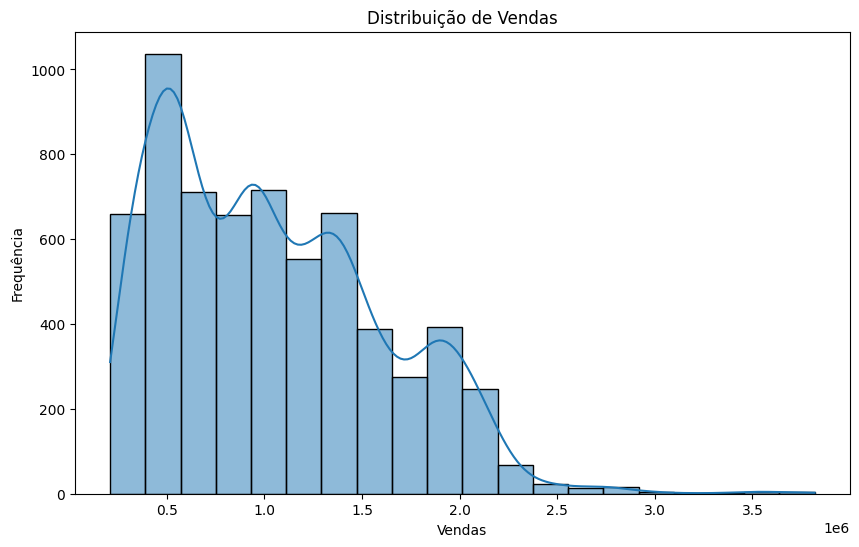

In [ ]:
#Histograma de uma variável específica (por exemplo, Vendas_Semanais)

plt.figure(figsize=(10,6))
sns.histplot(dados['Vendas_Semanais'], bins=20, kde=True)
plt.title('Distribuição de Vendas')
plt.xlabel('Vendas')
plt.ylabel('Frequência')
plt.show()

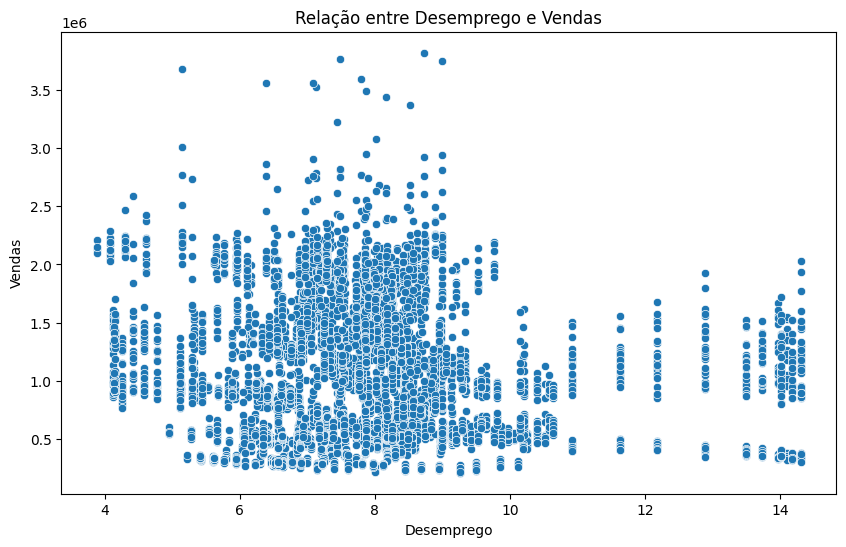

In [ ]:
#Gráfico de dispersão entre duas variáveis (por exemplo, Vendas_Semanais e Desemprego)

plt.figure(figsize=(10,6))
sns.scatterplot(x='Tx_Desemprego',y='Vendas_Semanais', data=dados)
plt.title('Relação entre Desemprego e Vendas')
plt.xlabel('Desemprego')
plt.ylabel('Vendas')
plt.show()

<ipython-input-9-790ed98bbd6f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados.corr()


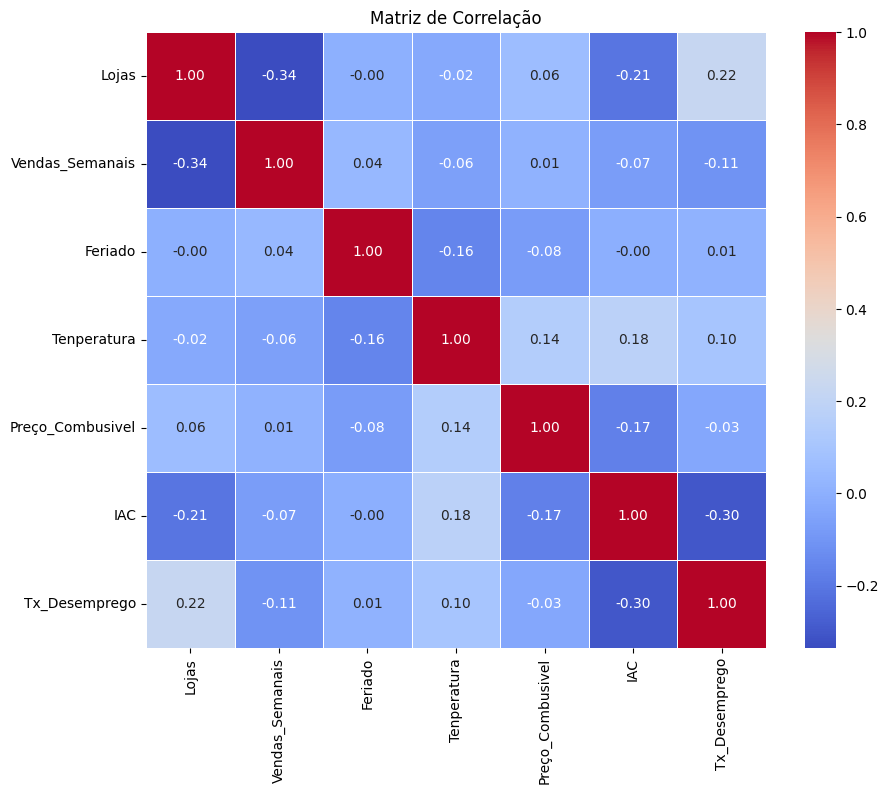

In [ ]:
#Matriz de correlação entre variáveis numéricas

correlacao = dados.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt ='.2f', linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()


In [ ]:
dados.head(5)

,Lojas,Data,Vendas_Semanais,Feriado,Tenperatura,Preço_Combusivel,IAC,Tx_Desemprego
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
#Ajustando os campos de data do dataframe

dados['Dia'] = pd.DatetimeIndex(dados.Data).day
dados['Semanas'] = pd.DatetimeIndex(dados.Data).week
dados['Mês'] = pd.DatetimeIndex(dados.Data).month
dados['Ano'] = pd.DatetimeIndex(dados.Data).year
#dados.drop('Data', axis=1, inplace=True)
dados.head(5)

<ipython-input-11-ba760468f54a>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dados['Dia'] = pd.DatetimeIndex(dados.Data).day
<ipython-input-11-ba760468f54a>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dados['Semanas'] = pd.DatetimeIndex(dados.Data).week
<ipython-input-11-ba760468f54a>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  dados['Semanas'] = pd.DatetimeIndex(dados.Data).week
<ipython-input-11-ba760468f54a>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayf

,Lojas,Data,Vendas_Semanais,Feriado,Tenperatura,Preço_Combusivel,IAC,Tx_Desemprego,Dia,Semanas,Mês,Ano
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2,17,5,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2,48,12,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,7,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,8,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,3,18,5,2010


In [ ]:
#Apagando a coluna Data

dados.drop('Data', axis=1, inplace=True)
dados.head(5)

,Lojas,Vendas_Semanais,Feriado,Tenperatura,Preço_Combusivel,IAC,Tx_Desemprego,Dia,Semanas,Mês,Ano
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,18,5,2010


In [ ]:
#Agrupando por loja e calculando a soma das vendas semanais

venda_semanal_loja = dados.groupby('Lojas')['Vendas_Semanais'].sum().reset_index()
venda_semanal_loja

,Lojas,Vendas_Semanais
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [ ]:
#Agrupando por loja e calculando a soma das vendas anuais

venda_anual_loja = dados.groupby('Ano')['Vendas_Semanais'].sum().reset_index()
venda_anual_loja

,Ano,Vendas_Semanais
0,2010,2.288886e+09
1,2011,2.448200e+09
2,2012,2.000133e+09


In [ ]:
#Qual foi o menor faturmaneto, o maior faturamento e a média entre as lojas?

In [ ]:
menor_faturamento = venda_semanal_loja['Vendas_Semanais'].min()
menor_faturamento

37160221.96

In [ ]:
maior_faturamento = venda_semanal_loja['Vendas_Semanais'].max()
maior_faturamento

301397792.46

In [ ]:
media = venda_semanal_loja['Vendas_Semanais'].mean()
media

149715977.49133334

In [ ]:
#Quais lojas tiveram o maior e o menor faturamento?

In [ ]:
# loja_menor_faturamento = venda_semanal_loja['Vendas_Semanais'].idmin()
# loja_maior_faturamento = venda_semanal_loja['Vendas_Semanais'].idmax()

In [ ]:
# Encontrando a loja com o menor faturamento
loja_menor_faturamento = dados.loc[dados['Vendas_Semanais'].idxmin()]['Lojas']

# Encontrando a loja com o maior faturamento
loja_maior_faturamento = dados.loc[dados['Vendas_Semanais'].idxmax()]['Lojas']

In [ ]:
loja_menor_faturamento

33.0

In [ ]:
loja_maior_faturamento

14.0

In [ ]:
# Agrupando por loja e calculando a soma das vendas semanais
venda_semanal_loja = dados.groupby('Lojas')['Vendas_Semanais'].sum().reset_index()

# Ordenando do maior para o menor faturamento
venda_semanal_loja_ordenado = venda_semanal_loja.sort_values(by='Vendas_Semanais', ascending=False)

# Exibindo o DataFrame ordenado
print(venda_semanal_loja_ordenado)

    Lojas  Vendas_Semanais
19     20     3.013978e+08
3       4     2.995440e+08
13     14     2.889999e+08
12     13     2.865177e+08
1       2     2.753824e+08
9      10     2.716177e+08
26     27     2.538559e+08
5       6     2.237561e+08
0       1     2.224028e+08
38     39     2.074455e+08
18     19     2.066349e+08
30     31     1.996139e+08
22     23     1.987506e+08
23     24     1.940160e+08
10     11     1.939628e+08
27     28     1.892637e+08
40     41     1.813419e+08
31     32     1.668192e+08
17     18     1.551147e+08
21     22     1.470756e+08
11     12     1.442872e+08
25     26     1.434164e+08
33     34     1.382498e+08
39     40     1.378703e+08
34     35     1.315207e+08
7       8     1.299512e+08
16     17     1.277821e+08
44     45     1.123953e+08
20     21     1.081179e+08
24     25     1.010612e+08
42     43     9.056544e+07
14     15     8.913368e+07
6       7     8.159828e+07
41     42     7.956575e+07
8       9     7.778922e+07
28     29     7.714155e+07
1

In [ ]:
#fazer novos testes no dataset.
